In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy

In [9]:
sobel_vertical_line_detector = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])


sobel_horizontal_line_detector = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

gaussian_blur = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])/16


In [10]:
def read_image():
    # Read in the image
    image = cv2.imread('pencil_pouch.jpg')

    # Change color to BGR to GRAY
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     plt.imshow(image, cmap='gray')
    
    return image

In [32]:
def convolute(image, kernel, edges=True):
    modified_image = copy.deepcopy(image)
    
    # Add padding around this image
    expanded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, 255)
    
    assert len(image) + 2 == len(expanded_image)
    assert len(image[0]) + 2 == len(expanded_image[0])
    
    for i in range(len(image)):
        for j in range(len(image[0])):
            top_left = expanded_image[i][j] * kernel[0][0]
            top_mid = expanded_image[i][j+1] * kernel[0][1]
            top_right = expanded_image[i][j+2] * kernel[0][2]
            mid_left = expanded_image[i+1][j] * kernel[1][0]
            mid_mid = expanded_image[i+1][j+1] * kernel[1][1]
            mid_right = expanded_image[i+1][j+2] * kernel[1][2]
            low_left = expanded_image[i+2][j] * kernel[2][0]
            low_mid = expanded_image[i+2][j+1] * kernel[2][1]
            low_right = expanded_image[i+2][j+1] * kernel[2][2]
            s = top_left + top_mid + top_right + mid_left + mid_mid + mid_right + low_left + low_mid + low_right
            if edges:
                modified_image[i][j] = 0 if s < 80 else s
    
    return modified_image

<Figure size 432x288 with 0 Axes>

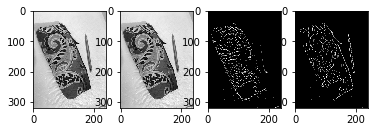

In [33]:
image = read_image()

# Do a blur first
blurred_image = convolute(image, gaussian_blur, edges=False)

# Detect horizontal edges on image
horizontal_edges_image = convolute(blurred_image, sobel_horizontal_line_detector)

# Detect vertical edges on image
vertical_edges_image = convolute(blurred_image, sobel_vertical_line_detector)

# plt.imshow(image, cmap='gray')
# Display images
plt.figure()
f, axarr = plt.subplots(1, 4) 
axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(blurred_image, cmap='gray')
axarr[2].imshow(horizontal_edges_image, cmap='gray')
axarr[3].imshow(vertical_edges_image, cmap='gray')
